In [1]:
from PyQSPICE import clsQSPICE as pqs

import math
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

pqs.chdir('tests/10_DC')
run = pqs("UJ3N065080")

run.qsch2cir()
run.cir2qraw()

df = run.LoadQRAW(["Id(J1)"])

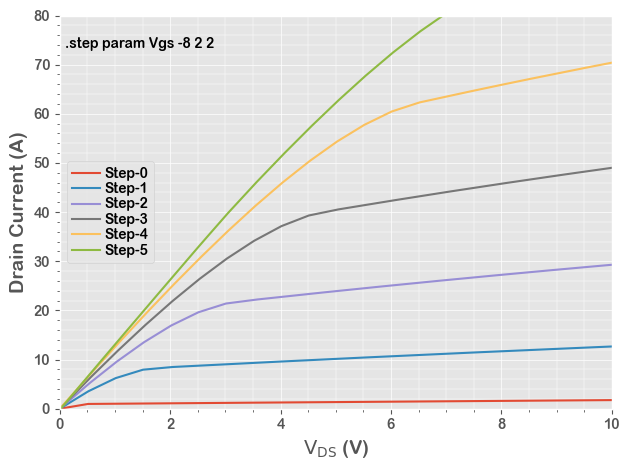

In [2]:
mpl.rcParams.update([['font.sans-serif', ["Arial Rounded MT Bold", 'Arial Unicode MS', 'Arial', 'sans-serif']], ["mathtext.default", "rm"], ["legend.labelspacing", 0.1], ["legend.columnspacing", 0.2], ["legend.handletextpad", 0.3], ['axes.formatter.useoffset', False], ['xtick.minor.visible', True], ['ytick.minor.visible', True], ['grid.linewidth', 1],["savefig.dpi", 300], ["axes.unicode_minus", False]])

plt.close('all')
plt.style.use('ggplot')

fig, ax = plt.subplots(tight_layout=True)

for i in range(run.sim['Nstep']):
    df[df.Step == i].plot(ax=ax, x=run.sim['Xlbl'],  y="Id(J1)", label="Step-" + str(i))

ax.set_xlim(run.sim['Xmin'],run.sim['Xmax'])
ax.set_ylim(0,80)
ax.set_ylabel('Drain Current (A)', fontsize=14)
ax.set_xlabel('$V_{DS}$ (V)', fontsize=14)
ax.minorticks_on()

ax.grid(which='major', linewidth="0.5")
ax.grid(which='minor', linewidth="0.35")

ax.text(0.1, 70, run.sim['StepInfo'])
plt.legend(ncol=1, loc="center left",fancybox=True)

plt.show()